# Overview

In our project, we wanted to determine if rap music has changed over the last few decades. We've gathered data from Billboard's Hot Weekly charts containing 28000+ songs and trimmed it down to approximately 3800 rap songs. From this analysis, we found INCLUDE FINAL ANALYSIS HERE

# Permissions, Names/PIDs, and Githubs

Permission Consensus: 
- [X] YES - make available
- [] NO - keep private

Names/PIDS - Githubs
- Andrew Li/A15664397 - drewli815
- Jialin Shan/A13826733 - j5shan
- Sameer Ahmed/A16094697 - the3L3M3NT
- Lacey Umamoto/A15726197 - lumamoto
- Rickesh Khilnani/A15481687 - rick10101221

# Research Question

In the past 60 years, how has rap music's lyrics and overarching themes evolved into the repetitive, monotonous genre it has become today? Can we form the conclusion that the main topics in rap have not changed after performing an analysis of the Billboard's number-one rap singles for each decade ranging from the 1960s to the 2010s?

# Background Research

- We realized that contemporary music is repetitive because a lot of songs have a repeating theme in the form of either lyrics or the type of beat. This is very evident in contemporary rap. A lot of rap songs cover the same topics: guns, liquor, drugs, money, sex, getting famous, being rich, etc. But one has to consider the type of beat that rap music uses. It's quite hard to tell the difference from one rap song to another if you were to just listen to the instrumental versions. The dull and repetitive nature of rap comes from exactly this.

- Therefore, in order to measure the monotony, we will be accumulating data from thousands of songs ranging from the 1960s - 2010s and performing an analysis on their overarching themes by using TF-IDF on the lyrics of all 3800 rap songs and looking at the differences in unique and common words. The American rap genre will be considered to have evolved from innovative to monotonous if rap music from the 1960s covers a range of topics other than the ones listed above as opposed to contemporary rap. In the 20th century, rap music was much more impactful and many pieces pushed to make public change. Nowadays, that isn't always the case. At least, not as often.

- The overarching theme of each song will be the most repeated keyword (after removing common english words), word counts will be some sort of map or Counter that associates frequencies with words. We will primarily be using Genius' API to gather lyrics.

- We believe there should be a change in the music industry. Today's music industry makes music that is solely for 'instant gratification' and is completely shallow. (Refer to the second resource in the *Past Studies* section below)

- We all listen to and enjoy music.

- Past Studies
    - There is an [article](https://www.rapanalysis.com/2015/08/the-23-most-repetitive-rappers/) that has illustrated the 23 most repetitive rappers, the highest being Will.I.Am and Kid Cudi. The analysis looked at how often certain keywords were said, but only compared it from artist to artist.
    - In this [tiny piece](https://roundup.brophyprep.org/index.php/2012/03/popular-hip-hop-music-praises-shallow-superficial-decadence/) (written 9 years ago), talks about how music used to promote good values, but in the 21st century, it has completely shifted to a shallow and superficial genre. He adds a quote from one of Drake's songs that only focuses on the aspects of life that are instantly gratifying: getting money, drinking, and smoking, namely.

- References (include links):
    - [Billboard's Hot Weekly Charts](https://data.world/kcmillersean/billboard-hot-100-1958-2017) 
    - [Genius API](https://docs.genius.com/)
    - [Lyrics-Extractor Package for Python](https://pypi.org/project/lyrics-extractor/) (canceled)
        - This can be used for retrieving and cross-referencing lyrics for data validity. Uses Genius' API
    - [Language Detector](https://pypi.org/project/langdetect/) 
    - [Spotify's Web API](https://spotipy.readthedocs.io/en/2.16.0/) (canceled)
    - [Spotify](https://www.spotify.com/us/) (canceled)
    - [MusixMatch API for lyrics](https://developer.musixmatch.com/) (canceled)  
    - Google Sheets to store accumulated data for each decade (at the end of project for reference)


# Hypothesis

After conducting a thorough analysis of music repetition, we believe that there exists a trend in contemporary rap music. This trend will be evident after comparing the overarching themes of rap music for each decade. We expect that, through these observations, we will find a repetitive trend because contemporary rap music focuses on the same topics for each song whereas older rap music used to cover a diverse range of topics so that each song and artist was refreshing and unique.

# Data

- What variables: song name, song title, song year, lyrics for song (dataframe 1), and keywords with their respective counts (dataframe 2). Dataframe 1 will contain the data for all 3800 songs and dataframe 2 will divide the respective counts for each decade in separate columns.

- How many observations: Varies depending on how many songs are on each Billboard for each decade. We will have to find a way to normalize our data so that the number of songs for each decade are the same. In total, however, we will trim a dataset of 28000 songs down to 3800 which are specifically rap songs.

- Who/what/how would these data be collected: 
    - Who
        - Each week, teams will be formed and tasks will be assigned to each subteam so that we can achieve maximum efficiency in data collection and analysis. Everyone's time would not be spent completing the same task and we will finish the project quicker. For example, team A may be tasked with data collection while team B will be in charge of parsing through it for cleaning (removing stop words, stemming, etc.)
    - What
        - At first, we will be collecting song names, artists, and the date at which each song reached number one. Then, using lyrics extractor, we will find the lyrics for each song. At this point, this is all the data collection we need. Additional steps include parsing through the data with TF-IDF, removing common English words, and developing an extra dataframe for holding word counts for each decade..
    - How
        - First using Billboard's number-one songs and exporting as a csv file. Then, we will read it in as a dataframe so that we can then iterate through each song title and run the lyrics extractor package on it. Then we will simply store each lyric body in the dataframe, remove any common English words from each lyric body, and iterate through all of the lyrics and associate counts with each word.

- How would these data be stored/organized: Pandas dataframe which will be used for building visualizations. Again, the data will be organized as two separate data frames for processing (see above)

- What kind of songs are you collecting: We will be collecting Billboard's number-one songs for each decade from the 1960s to the 2010s. The number of songs for each decade varies, so we will have to establish a numerical bottleneck.

- Dataset 1:
    - Dataset Name: Billboard Hot Weekly Charts
    - [Link to the dataset](https://data.world/kcmillersean/billboard-hot-100-1958-2017)
    - Number of total observations: 28500
    - Truncated observation count for specifically 'rap': 3850

- Notes
    - We will ONLY be looking at rap songs for this analysis. This is purely from Billboard's Hot Weekly charts so that we get a rough estimate of what the most popular songs are for each decade. Therefore, this may not capture ALL topics in rap over the last 6 decades.
    - Because we have a method of retrieving all of the lyrics for each song in our data set, we know that we will have more than 25000+ words and 3800+ songs to parse through, which is more than enough to model the overarching themes for each decade for comparison with one another.


# Setup

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation
import re
from nltk.stem import SnowballStemmer
from autocorrect import Speller
from collections import Counter 
import spacy
from datetime import datetime
import numpy as np
from langdetect import detect
from bs4 import BeautifulSoup
import requests
import unicodedata
from collections import defaultdict
import math
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
# import warnings
# import matplotlib.cbook
# warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

# Data Cleaning

Cut down 28000 observations to 3400 specifically pertaining to rap, merging columns to get a single ID, dropping identical songs, and creating a final dataframe to hold the lyrics of every song.

Read in the Billboard's Hot weekly charts and their audio features retrieved from Spotify Web API (`df`), and when each correponding song has hit Billboard (`df_hotstuff`).

In [70]:
df = pd.DataFrame(pd.read_excel("../data/Hot 100 Audio Features.xlsx"))
df_hotstuff = pd.DataFrame(pd.read_csv("../data/Hot Stuff.csv"))

### Cutting Down Data

Here, we are dropping any obserations without any genre specified, assuming that they were not considered rap songs because they weren't explicitly tagged with it. This **ALSO** excludes songs without a rap tag entirely, including 'Hip Hop' songs (hip hop songs have an explcit 'hip hop' tag). Therefore, we are solely focusing on rap music in the entire data set. 

`df_rap` will contain observations that have the 'rap' genre in their spotify_genre's list. Lastly, we drop duplicates that may have emerged through the data collection process.

In [71]:
# drop songs without genres
df.dropna(subset=['spotify_genre'], inplace=True)

# get songs with rap genre
df_rap = pd.DataFrame()
for index, row in df.iterrows():
    genres = df.spotify_genre.squeeze()[index]
    if 'rap' in genres:
        df_rap = df_rap.append(row)

# drop duplicate songs (songs with same songID)
df_rap = df_rap.drop_duplicates(subset=['SongID'], keep='first')

### Merging Dataframes

Merging both datasets so we can work with one dataframe. We also drop any duplicates as a result of the merge.

In [72]:
# merge df_rap and df_hotstuff to get weekID
df_merge = pd.merge(df_rap, df_hotstuff, how='left')

# drop songs with no weekID
df_merge.dropna(subset=['WeekID'], inplace=True)

# drop duplicate songs (songs with same songID)
df_merge = df_merge.drop_duplicates(subset=['SongID'],keep='first')

### Getting Years

For our data analysis, we only need to keep the `Year`, `Performer` and `Song` title for each observation in order to retrieve the lyrics. Since we only considering data on a per decade basis, we can abstract away the precision given by months and days, leaving only years. We store this in `df_final`

In [73]:
# get years
years = []
for index, row in df_merge.iterrows():
    weekID = df_merge.WeekID[index]
    year = datetime.strptime(weekID, "%m/%d/%Y").year
    years.append(year)
df_merge['Year'] = years

# get final dataframe with year, performer, and song
df_final = df_merge[['Year', 'Performer', 'Song']]
df_final = df_final.reset_index(drop=True)

### Getting Lyrics

#### Helper Function

Strips accents from text.

In [74]:
# strip accents from text
# ex. beyoncé --> beyonce
def strip_accents(text):
    try:
        text = unicode(text, 'utf-8')
    except NameError:
        pass
    text = unicodedata.normalize('NFD', text)\
           .encode('ascii', 'ignore')\
           .decode("utf-8")
    return str(text)

#### Make API call to get page to scrape from

In [75]:
def get_url(song_title, artist_name):
    # print("Searching for: ", song_title, "-", artist_name)
    
    # get song title and artist
    # convert to lowercase, remove non-alphanumeric characters
    
    title = re.sub(r'[^a-zA-Z0-9-$() ]', '', song_title.lower())
    #print("Title:", title)
    
    title_simple = re.sub(r'[^a-zA-Z0-9- ]', '', title)
    #print(title_simple)
    
    # title with no parentheses
    title_noparen = re.sub(r'\([^)]*\)', '', title)
    #print("Title no paren:", title_noparen)
    
    # replace dollar signs with s's
    title_nodollar = title.replace("$", "s")
    #print(title_nodollar)
    
    artist = re.sub(r'[^a-zA-Z0-9-$() ]', '', artist_name.lower())
    #print("Artist:", artist)
    
    artist_simple = re.sub(r'[^a-zA-Z0-9- ]', '', artist)
    #print(artist_simple)
    
    artist_nodollar = artist.replace("$", "s")
    #print(artist_nodollar)
    
    artist_split = artist.split()
    #print("Artist Split:", artist_split)
    
    # main artist
    if 'featuring' in artist:
        artist_nofeat = artist.split('featuring')[0]
    elif ',' in artist:
        artist_nofeat = artist.split(',')[0]
    else:
        artist_nofeat = artist 
    #print("Artist No Feat:", artist_nofeat)
    
    # set up request
    headers = {'Authorization': 'Bearer ' + 'zZ6YtjOlYsm1o5Me_vIO6MczexIf6k5PGlgiMHi4aO6bnZmsyVdG7J7YQ0VXIOHE'}
    data = {'q': title_noparen + ' ' + artist_nofeat}
    base_url = 'https://api.genius.com'
    search_url = base_url + '/search'
    
    current_page = 1 # page number of results
    next_page = True
    
    while next_page:
        params = {'page': current_page} # set page number
        response = requests.get(search_url, data=data, headers=headers, params=params)
        d = response.json()
        page_hits = d['response']['hits']
        
        # if there are hits on the page
        if page_hits:
            # go through all hits
            for hit in page_hits:
                res = hit['result']
                
                # name of primary artist
                name = res['primary_artist']['name']
                name = strip_accents(name)
                name = re.sub(r'[^a-zA-Z0-9- ]', '', name.lower())
                #print("Name:",name)
                
                full_title = res['full_title']
                full_title = strip_accents(full_title)
                # convert full_title to lowercase and remove non-alphanumeric characters
                full_title = re.sub(r'[^a-zA-Z0-9- ]', '', full_title.lower())
                #print("Full Title:", full_title)
                
                if (
                    # 'lyrics' substring is in url
                    'lyrics' in res['url'] and
                     # song title (w/ or w/o parentheses) is in full title
                    (title in full_title or 
                     title_noparen in full_title or
                     title_nodollar in full_title or
                     title_simple in full_title
                    ) and
                    # 1st or 2nd word in artist is in full title or 
                    # main artist (no features) is in full title or name
                    (artist_nofeat in full_title or 
                     artist_nofeat in name or
                     artist_split[0] in full_title or
                     (len(artist_split) > 1 and artist_split[1] in full_title) or
                     artist_nodollar in full_title or
                     artist_nodollar in name or
                     artist_simple in full_title or
                     artist_simple in name
                    ) and
                    # 1st or 2nd word in artist is in name from response
                    (artist_split[0] in name or
                     (len(artist_split) > 1 and artist_split[1] in name)
                    ) and
                    # song is not a translation
                    'espanol' not in full_title and
                    'nederlandse' not in full_title and
                    'polskie' not in full_title and
                    'portugues' not in full_title and
                    'francaise' not in full_title and
                    'deutsche' not in full_title and
                    'oversttelse' not in full_title and
                    'traduzione' not in full_title and
                    'ceviri' not in full_title and
                    'translation' not in full_title and
                    # song is not a review by rap critic
                    'rap critic' not in full_title and
                    # song is not instrumental
                    'instrumental' not in full_title and
                    # song is not a parody
                    'parody' not in full_title
                ):
                    url = res['url']
                    # print("URL found: ", url)
                    return url
                    
            # increment current_page value for next loop
            current_page += 1
            # print("Finished scraping page {}".format(current_page))
            
            # if lyrics not on first 10 pages, stop
            if (current_page == 10):
                next_page = False
        else:
            # if page_hits is empty, stop
            next_page = False
        
    return 0

#### Scrape page for lyrics

In [76]:
def get_lyrics(song_title, artist_name):
    url = get_url(song_title, artist_name)
    if url == 0:
        print("Lyrics not found for", song_title, "-", artist_name)
        return np.NaN
    else:
        page = requests.get(url)
        html = BeautifulSoup(page.text, 'html.parser')
        lyrics = html.find('div', class_='lyrics').get_text()
        return lyrics

#### Get lyrics

Uses all three helper functions defined above to retrieve the lyrics for all rap songs. For quick access (and to avoid having to rerun this cell at all), we store the final dataframe in `Hot100DataWithNanLyrics.csv`

In [9]:
lyrics_list = []

for i, row in df_final.iterrows():
    if (i % 10 == 0): 
        print (str(round(i/len(df_final) * 100, 2)) + '% done')
    artist = row['Performer']
    song = row['Song']
    lyrics = get_lyrics(song, artist)
    # print(lyrics)
    lyrics_list.append(lyrics)
    
df_final['Lyrics'] = lyrics_list
df_final.to_csv("../data/Hot100DataWithNanLyrics.csv")

0.0% done
0.28% done
0.56% done
0.83% done
1.11% done
1.39% done
1.67% done
1.95% done
2.23% done
2.5% done
Lyrics not found for 223's - YNW Melly & 9lokknine
2.78% done
3.06% done
3.34% done
3.62% done
3.9% done
4.17% done
4.45% done
4.73% done
5.01% done
5.29% done
Lyrics not found for How About Now - Drake
5.56% done
5.84% done
6.12% done
6.4% done
Lyrics not found for Apes**t - The Carters
6.68% done
6.96% done
Lyrics not found for Dear Mama/Old School - 2Pac
7.23% done
7.51% done
Lyrics not found for Move B***h - Ludacris Featuring Mystikal & Infamous 2.0
7.79% done
Lyrics not found for From Her Mama (Mama Got A**) - Juvenile
Lyrics not found for Envy/Firewater - Fat Joe
8.07% done
8.35% done
8.63% done
8.9% done
9.18% done
9.46% done
Lyrics not found for Sexy Lady - Yung Berg Featuring Junior
9.74% done
10.02% done
10.29% done
Lyrics not found for She's Mine Pt.1 - J. Cole
10.57% done
10.85% done
11.13% done
11.41% done
Lyrics not found for 3am - Eminem
11.69% done
11.96% done
12

66.78% done
67.06% done
67.33% done
Lyrics not found for I Am The Champion - B.o.B
67.61% done
67.89% done
68.17% done
68.45% done
68.73% done
69.0% done
Lyrics not found for Now & Later - Sage The Gemini
69.28% done
Lyrics not found for My Choppa Hate N****s - 21 Savage & Metro Boomin
69.56% done
69.84% done
Lyrics not found for Ice Tray - Quavo & Lil Yachty
70.12% done
70.4% done
70.67% done
70.95% done
Lyrics not found for Start This S**t Off Right - Lil Wayne Featuring Ashanti & Mack Maine
71.23% done
Lyrics not found for Request Line - The Black Eyed Peas Featuring Macy Gray
71.51% done
71.79% done
72.06% done
Lyrics not found for B-Please - Snoop Dogg Featuring Xzibit & Nate Dogg
72.34% done
72.62% done
Lyrics not found for All Through The Night - Tone-Loc
72.9% done
73.18% done
73.46% done
73.73% done
Lyrics not found for Real Wild Child - Ivan
Lyrics not found for The 81 - Candy & The Kisses
74.01% done
74.29% done
Lyrics not found for Ryde Or Die, Chick - The Lox Featuring Tim

#### Drop rows with no lyrics

In [10]:
# drop rows with no lyrics
df_final.dropna(subset=['Lyrics'], inplace=True)

# export to csv
df_final.to_csv("../data/Hot100Data.csv")

We dropped 170 songs from our dataset because we were unable to find the lyrics for them using the Genius API. After dropping these songs, we now have a total of **3428 observations** in our dataset.

### Range of Years for Dataset

Check to see if the minimum and maximum years are still 1958 - 2019

In [16]:
print(min(df_final['Year']), max(df_final['Year']))

# Find how many songs are in the earliest year
print(len([df_final['Year'] == '1959']))

1959 2019
1


Although our earliest year is 1959 and we only have one song from that year, we can still group it with the 1960s. We've decided to keep this rather than remove it just because our analysis still covers a span of approximately 60 years. 

Before we begin our analysis, we need to check if there are any unexpected results. 

NOTE: Later in the analysis, we remove any songs whose language is not english (since we are only constricting our analysis to the repetition of English words). Keep in mind that the removal of English words later in the process does not affect our analysis in any way (besides the runtime).

In [136]:
# check to see if no songs were randomly lost
# rap songs in our original data set
og_rap_count = len([song for song in df_rap['spotify_genre'] if 'rap' in song])

# check to see if each song name is unique and that we have a total of 3598 unique songs (before removal)
unique_song_count = len(df_rap['SongID'].unique())

# total rap songs after clean-up (must account for 170 songs manually removed because we were unable to find their lyrics)
now_rap_count = df_final.shape[0]

# assertion checks
assert og_rap_count == unique_song_count == (now_rap_count + 170) # manually removed songs
# print(unique_song_count, now_rap_count)

# Data Analysis and Results

### Notes
For visualizations and discussion, we will refer to a total of 6 different bins: this includes songs from the 1960s (with one song from 1959), 1970s, 1980s, 1990s, 2000s, and 2010s.

As stated above, we have taken out songs whose lyrics we could not find when scrapping through Genius. A few cells after this one, we also remove any songs that are not considered English (as determined by the [langdetect](https://pypi.org/project/langdetect/) library)

Therefore, the exact data we will be looking at are English rap songs from the 1960s - 2010s, which was stated above, with one song from 1959. 

### Algorithms

- Spacy
- TF-IDF

We use Spacy to initially remove any stop words from the dataset in order to get a finalized dataframe that will contain the most common words across decades. We remove stop words because we want to able to 1) convert contractions into regular words (such as slang) and 2) correct the spelling of words (because some words may be weirdly mispelled) so that the data can actually be used for analysis and data visualizations.

We use TF-IDF on the original rap lyrics (`df_final`) so that each word can be considered _within its context_. We don't want to abstract each word from its surrounding and then calculate TF-IDF, because then we lose the exact number of songs in our collection of songs that contain each word, which is a vital part of the inverse document frequency.

Below is a dictionary for contractions in English retrived from the web. This is not included in the language toolkit, thus it is manuallly added here. 

In [ ]:
contractions_dict = {     
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I had",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "iit will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

From here the pipeline of cleaning the data for text analysis is prepared, such as removing punctuation, stopwords, digits, correcting spelling, and everything would be in lowercase.

In [69]:
wordnet_lemmatizer = WordNetLemmatizer()
snowball_stemmer = SnowballStemmer('english')
punct=punctuation+'’'+'“'+'”'+'–'

def expand_contractions(text, contractions_dict):
    """
    expand english contractions
    """
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match) \
            if contractions_dict.get(match) \
            else contractions_dict.get(match.lower())
        expanded_contraction = expanded_contraction
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

def autospell(text):
    """
    correct the spelling of the word.
    """
    spell = Speller(lang='en',fast=True)
    spells = [spell(w) for w in (nltk.word_tokenize(text))]
    return " ".join(spells)

nlp = spacy.load('en_core_web_sm', disable=['parser', 'tagger', 'ner']) #load small english core library
stops = stopwords.words("english") #load stopwords



def normalize(text, lowercase, remove_stopwords):
    '''
    clean the text into desired format for text analysis
    '''
    text = expand_contractions(text,contractions_dict) #expand english contractions
    text = autospell(text) #correct spelling
    #text = ' '.join([w.lower() for w in nltk.word_tokenize(text)])  #lowercase
    text = re.sub('<[^<]+?>','', text)  #remove brackets
    text = ''.join(c for c in text if not c.isdigit())  #remove numbers
    text = ''.join(c for c in text if c not in punct)  #remove punctuations
    if lowercase:
        text = text.lower()  #lowercase
    text = nlp(text)
    lemmatized = list()
    for word in text:
        lemma = word.lemma_.strip() #tokenize
        if lemma:
            if not remove_stopwords or (remove_stopwords and lemma not in stops):  #remove stopwords
                lemmatized.append(lemma)
    return lemmatized

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

Below the dataframe is filtered to contain only English lyrics, and the cleaning function is applied to the lyric column.

In [3]:
df=pd.read_csv('../data/Hot100Data.csv')
df['lang']=df.Lyrics.apply(detect)
df=df[df['lang']=='en']
df['After_Clean'] = df['Lyrics'].apply(normalize, lowercase=True, remove_stopwords=True)
df.drop(columns=['Unnamed: 0','lang'], inplace=True)
df.to_csv('cleandata.csv')

NameError: name 'normalize' is not defined

### TF-IDF

#### Helper functions for calculating TF-IDF

In [2]:
df_final = pd.read_csv("../data/cleandata.csv",converters={'After_Clean': eval})
df_final['doc']=df_final['After_Clean'].apply(lambda x:' '.join(x))

# term frequency
# t: term
# d: document
# returns the number of times t appears in d
def tf(t, d):
    return d.count(t)

# inverse document frequency
# t: term
# N: total number of documents
# returns the IDF of a term
def idf(t, N, docCount):
    n_t = abs(docCount[t]) # number of documents containing t
    return math.log(N/n_t, 10)

This function takes in a decade dataframe df and returns another dataframe containing the TF-IDF values for each word in the lyrics for df.

In [3]:
def get_tfidf_df(df):
    # dictionary that keeps track of words and the number of documents they appear in
    docCount = defaultdict(int)

    # build dictionary
    for i, row in df.iterrows():
        words = row['After_Clean']
        r = row['doc']
        seen = set() # words seen in current document
        for w in words:
            # increment docCount for word w if it is in current document
            if w not in seen:
                docCount[w] += 1
                seen.add(w)

    # dictionary that keeps track of words and their tfidf values
    tfidf_dict = defaultdict(int)

    for i, row in df.iterrows():
        words = row['After_Clean']
        r = row['doc']
        for w in words:
            my_tf = tf(w, r)
            my_idf = idf(w, len(df), docCount)
            tfidf_dict[w] += my_tf * my_idf
    
    # sort by tfidf values, descending
    tfidf_counts = [(tfidf_dict[w], w) for w in tfidf_dict]
    tfidf_counts.sort()
    tfidf_counts.reverse()
    
    # turn into dataframe
    tfidf_df = pd.DataFrame(tfidf_counts)
    tfidf_df.columns = ["TF-IDF", "Term"]
    
    return tfidf_df

Separate `df_final` by decade.

In [4]:
df_5960 = df_final[df_final['Year'] <= 1969] # includes 1959, 35 observations
df_70 = df_final.loc[(df_final['Year'] >= 1970) & (df_final['Year'] <= 1979)] # 14 observations
df_80 = df_final.loc[(df_final['Year'] >= 1980) & (df_final['Year'] <= 1989)] # 53 observations
df_90 = df_final.loc[(df_final['Year'] >= 1990) & (df_final['Year'] <= 1999)] # 483 observations
df_00 = df_final.loc[(df_final['Year'] >= 2000) & (df_final['Year'] <= 2009)] # 1050 observations
df_10 = df_final.loc[(df_final['Year'] >= 2010) & (df_final['Year'] <= 2019)] # 1813 observations

Get all TF-IDF dataframes for each decade.

In [5]:
tfidf_5960 = get_tfidf_df(df_5960)
tfidf_70 = get_tfidf_df(df_70)
tfidf_80 = get_tfidf_df(df_80)
tfidf_90 = get_tfidf_df(df_90)
tfidf_00 = get_tfidf_df(df_00)
tfidf_10 = get_tfidf_df(df_10)

Display the top 10 words with the highest TF-IDF values in each decade.

In [6]:
print(tfidf_5960[:10])
print(tfidf_70[:10])
print(tfidf_80[:10])
print(tfidf_90[:10])
print(tfidf_00[:10])
print(tfidf_10[:10])

        TF-IDF   Term
0  3528.527425  giddy
1  1365.798303     la
2   675.382202    mia
3   675.382202  hound
4   675.382202    dog
5   675.382202   cara
6   662.797982    yes
7   652.137928  loose
8   571.461853    cry
9   546.360327   baby
        TF-IDF    Term
0  1821.569301     get
1   755.517648      ta
2   428.651885    numb
3   418.798245     hot
4   313.148244    want
5   224.641095  summer
6   197.752941    work
7   166.484314   night
8   165.042437      la
9   165.042437    fade
        TF-IDF    Term
0  9339.339425    wild
1  9339.339425     bow
2  3763.164251   break
3  3098.438040      ah
4  3027.243974       g
5  2965.754496  tricky
6  2439.434427    jump
7  2371.934420    push
8  2219.143044    mary
9  2056.590288    type
         TF-IDF    Term
0  22980.031111     dat
1  17964.259176       e
2  13438.207902    jump
3  12980.375201    wake
4  11759.790352  weasel
5  11037.136383       g
6  11016.828822     duh
7  10944.511294      ha
8   9065.855760     yes
9   8084.393

### Data Visualization

#### Setup For Global Variables

In [13]:
palette = 'Purples'
newPalette = 'Purples_r'
axesSize = 12
titleSize = 14
colors = ['#ffa600','#ff6e54','#dd5182','#955196','#444e86','#003f5c']
customPalette=sns.set_palette(sns.color_palette(colors))


#### Distplots and Histogram

First we will include 6 distplots of the total raw word counts by decade. Here, we can see the distribution of word counts per decade to see if there are any outstanding ones. 

Visualization Description:
- X-axis: number of words in a song
- Y-axis: number of songs with that word count

In [8]:
# Find the total word count for a given song
def word_count(lst):
    total_words = 0
    for i in lst:
        total_words += 1
    return total_words

# Create column with word count for specific column. We apply the word_count algorithm 
# above on the After_Clean column, which contains the cleaned original lyrics after the 
# Spacy's procedure
df_5960['word count'] = df_5960['After_Clean'].apply(word_count)
df_70['word count'] = df_70['After_Clean'].apply(word_count)
df_80['word count'] = df_80['After_Clean'].apply(word_count)
df_90['word count'] = df_90['After_Clean'].apply(word_count)
df_00['word count'] = df_00['After_Clean'].apply(word_count)
df_10['word count'] = df_10['After_Clean'].apply(word_count)

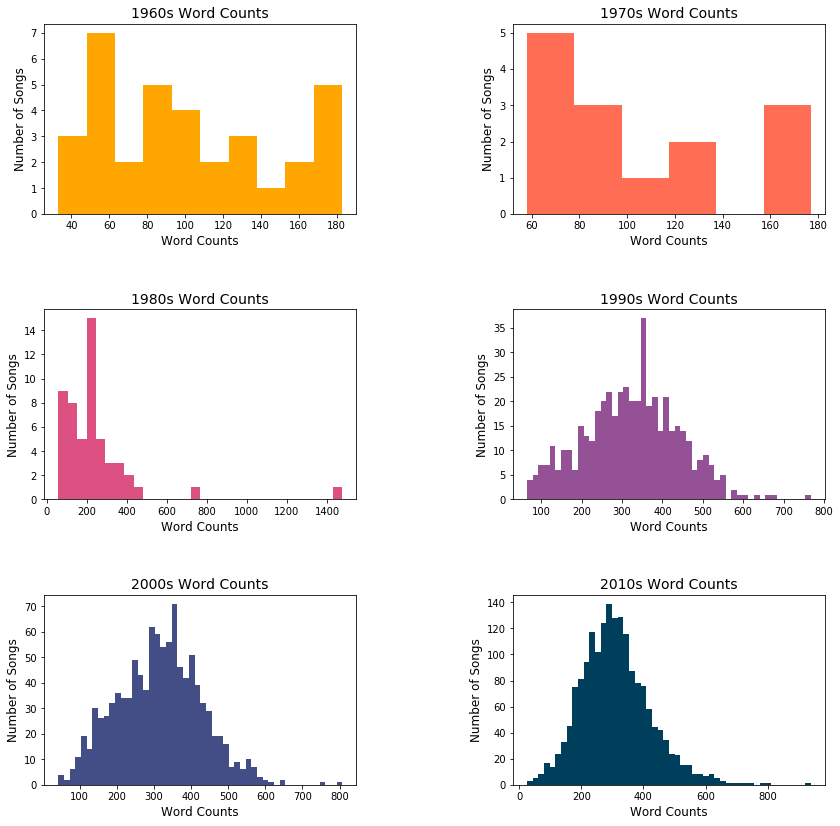

In [16]:
# Graph 6 density plots illustrating the distribution of song lengths for each decade
plt.figure(figsize=(14,14))
# Spaces out subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)
# Constants for column selection, and axes labels
column = 'word count'
xLabel = 'Word Counts'
yLabel = 'Number of Songs'

# Subplot format: 3 rows, 2 columns, 1 plot
plt.subplot(321)
sns.distplot(df_5960[column], bins=10, kde=False,color=colors[0],hist_kws=dict(alpha=1)).set_title('1960s Word Counts', size=titleSize)
plt.xlabel(xLabel, size=axesSize)
plt.ylabel(yLabel, size=axesSize)

# 2nd plot
plt.subplot(322)
sns.distplot(df_70[column], bins=6, kde=False,color=colors[1],hist_kws=dict(alpha=1)).set_title('1970s Word Counts', size=titleSize)
plt.xlabel(xLabel, size=axesSize)
plt.ylabel(yLabel, size=axesSize)

# 3rd plot
plt.subplot(323)
sns.distplot(df_80[column], bins=30, kde=False,color=colors[2],hist_kws=dict(alpha=1)).set_title('1980s Word Counts', size=titleSize)
plt.xlabel(xLabel, size=axesSize)
plt.ylabel(yLabel, size=axesSize)

# 4th plot
plt.subplot(324)
sns.distplot(df_90[column], bins=50, kde=False,color=colors[3],hist_kws=dict(alpha=1)).set_title('1990s Word Counts', size=titleSize)
plt.xlabel(xLabel, size=axesSize)
plt.ylabel(yLabel, size=axesSize)

# 5th plot
plt.subplot(325)
ax5 = sns.distplot(df_00[column], bins=50, kde=False,color=colors[4],hist_kws=dict(alpha=1)).set_title('2000s Word Counts', size=titleSize)
plt.xlabel(xLabel, size=axesSize)
plt.ylabel(yLabel, size=axesSize)

# 6th plot
plt.subplot(326)
sns.distplot(df_10[column], bins=50, kde=False,color=colors[5],hist_kws=dict(alpha=1)).set_title('2010s Word Counts', size=titleSize)
plt.xlabel(xLabel, size=axesSize)
plt.ylabel(yLabel, size=axesSize)

plt.show()

As shown in the illustrations above, it is evident that the average length of songs have nearly doubled.

In [10]:
print('1960s Average Length:', df_5960[column].mean())
print('2010s Average Length:', df_10[column].mean())

1960s Average Length: 101.32352941176471
2010s Average Length: 310.17807456872566


We do see an outlier in 1980s, which may skew data in future analyses. However, we can still visually see the differences between the lengths of songs from the 1980s (ie the data is not entirely clustered together).

For the most part (due to the law of large numbers), the distributions from the 1990s onwards have a normal distribution. The songs prior, namely the 1960s-70s, do not have a large enough dataset to achieve normality, and the 1980s is skewed right.

Next we will include a histogram of the average word counts by decade. Here, we can see the visually plot the differences of song length from decade to decade. This is an extension of the mean calculation above.

Visualization Description:
- Bins will be decades
- X-axis: decade
- Y-axis: average word count 

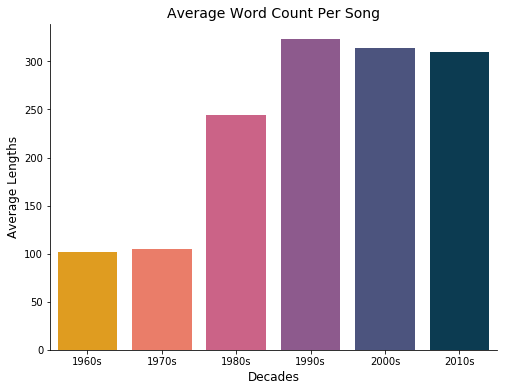

In [17]:
# Histogram code for total raw word count here
column = 'word count'
decades = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
means = [df_5960[column].mean(), df_70[column].mean(), 
         df_80[column].mean(), df_90[column].mean(), 
         df_00[column].mean(), df_10[column].mean()]

df_of_totals = pd.DataFrame({'decades': decades, 'averages': means})

plt.figure(figsize=(8,6))
sns.barplot("decades", "averages", data=df_of_totals, palette=customPalette)\
    .set_title("Average Word Count Per Song", size=titleSize)
plt.xlabel('Decades', size=axesSize)
plt.ylabel('Average Lengths', size=axesSize)
sns.despine()

As shown, there is a sharp increase in song count from the 70s to the 80s, increasing again in the 90s and slowly declining ever since. I believe this increase from the 70s to 80s is due to an increase in song duration and an overall shift of rap style. 

The decline in average word count starting from the 90s can be attributed to an increase in beat oriented rap, versus a more lyrical based one. 

Our song count from the 60s and 70s are small, but this could be several things. Although we averaged out the word counts, due to the fact that we have a less diverse of a dataset than the subsequent decades, our counts may not be a true representation of rap from the 60s and 70s.

#### Bar Graphs

Next, from the Spacy's dataset, we will construct multiple bar graphs and place them side by side to visually see the most common words of each decade. This way, we can start to get an idea of the differences between each decade of rap music.

Visualization Description:
- Each graph will have top 15 words
- Top 15 words in a bar graph per decade

In [18]:
c = Counter()

# Apply counter to each dataframe to get a 6 dictionaries each with format 
# word: frequency
word_count_5960 = df_5960['After_Clean'].apply(Counter).sum()
word_count_70 = df_70['After_Clean'].apply(Counter).sum()
word_count_80 = df_80['After_Clean'].apply(Counter).sum()
word_count_90 = df_90['After_Clean'].apply(Counter).sum()
word_count_00 = df_00['After_Clean'].apply(Counter).sum()
word_count_10 = df_10['After_Clean'].apply(Counter).sum()

result5960 = {}
result70 = {}
result80 = {}
result90 = {}
result00 = {}
result10 = {}

for w in sorted(word_count_5960, key=word_count_5960.get, reverse=True):
    result5960[w] = word_count_5960[w]

for w in sorted(word_count_70, key=word_count_70.get, reverse=True):
    result70[w] = word_count_70[w]
    
for w in sorted(word_count_80, key=word_count_80.get, reverse=True):
    result80[w] = word_count_80[w]
    
for w in sorted(word_count_90, key=word_count_90.get, reverse=True):
    result90[w] = word_count_90[w]
    
for w in sorted(word_count_00, key=word_count_00.get, reverse=True):
    result00[w] = word_count_00[w]
    
for w in sorted(word_count_10, key=word_count_10.get, reverse=True):
    result10[w] = word_count_10[w]
      
# Create dataframe for plotting
df5960_counts = pd.DataFrame(list(result5960.items()),columns = ['words','counts'])
df70_counts = pd.DataFrame(list(result70.items()),columns = ['words','counts'])
df80_counts = pd.DataFrame(list(result80.items()),columns = ['words','counts'])
df90_counts = pd.DataFrame(list(result90.items()),columns = ['words','counts'])
df00_counts = pd.DataFrame(list(result00.items()),columns = ['words','counts'])
df10_counts = pd.DataFrame(list(result10.items()),columns = ['words','counts'])

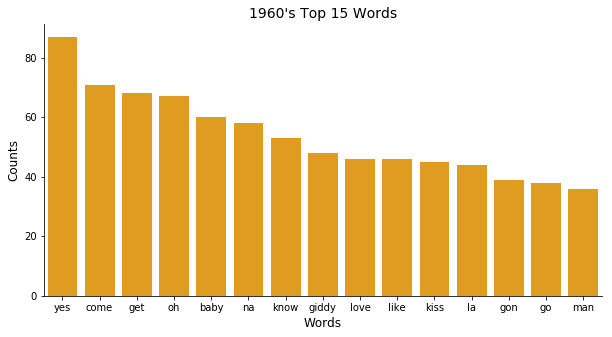

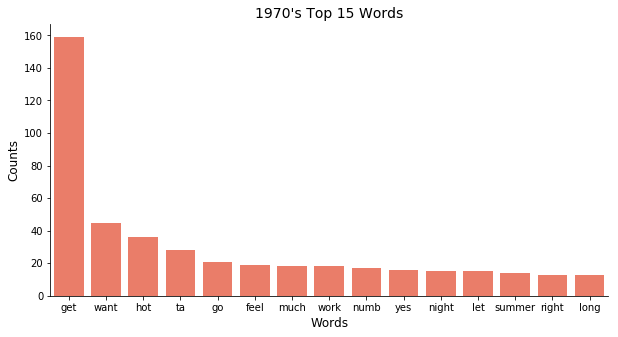

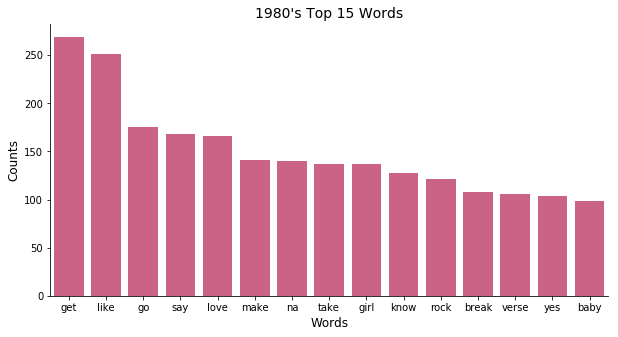

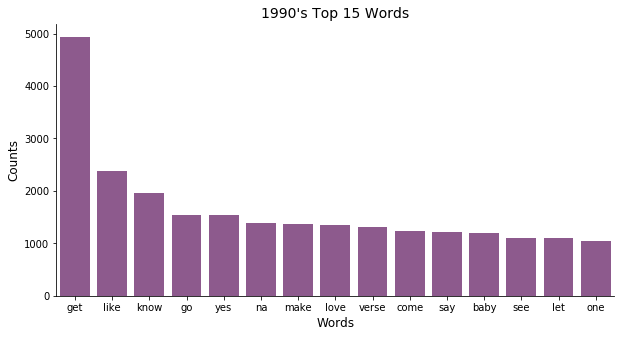

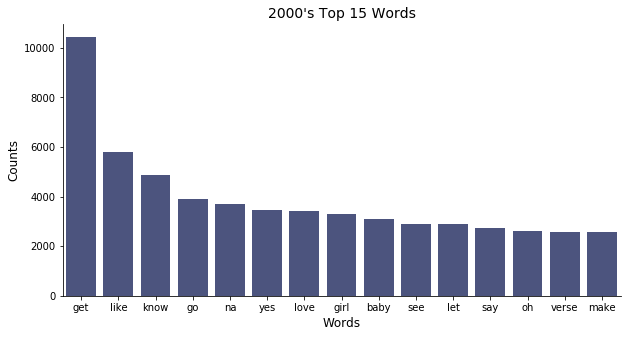

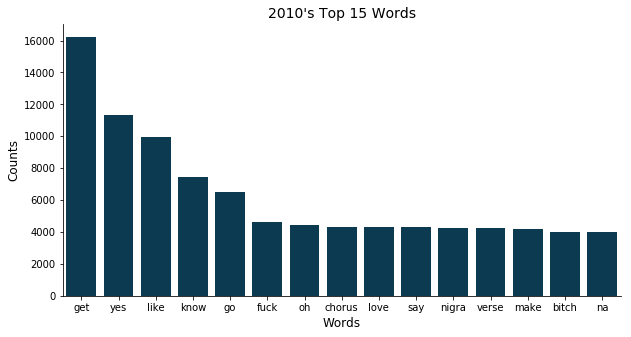

In [20]:
# Constants
xVal = 'words'
yVal = 'counts'
xLabel = 'Words'
yLabel = 'Counts'

# plot 1
plt.figure(figsize=(10,5))
top_common_df5960 = df5960_counts.iloc[0:15]
ax1 = sns.barplot(xVal, yVal, data=top_common_df5960, color=colors[0])\
    .set_title("1960's Top 15 Words", size=titleSize)
plt.xlabel(xLabel, size=axesSize)
plt.ylabel(yLabel, size=axesSize) 
sns.despine()

# plot 2
plt.figure(figsize=(10,5))
top_common_df70 = df70_counts.iloc[0:15]
ax2 = sns.barplot(xVal, yVal, data=top_common_df70, color=colors[1])\
    .set_title("1970's Top 15 Words", size=titleSize)
plt.xlabel(xLabel, size=axesSize)
plt.ylabel(yLabel, size=axesSize)
sns.despine()

# plot 3
plt.figure(figsize=(10,5))
top_common_df80 = df80_counts.iloc[0:15]
sns.barplot(xVal, yVal, data=top_common_df80, color=colors[2])\
    .set_title("1980's Top 15 Words", size=titleSize)
plt.xlabel(xLabel, size=axesSize)
plt.ylabel(yLabel, size=axesSize)
sns.despine()

# plot 4
plt.figure(figsize=(10,5))
top_common_df90 = df90_counts.iloc[0:15]
sns.barplot(xVal, yVal, data=top_common_df90, color=colors[3])\
    .set_title("1990's Top 15 Words", size=titleSize)
plt.xlabel(xLabel, size=axesSize)
plt.ylabel(yLabel, size=axesSize)
sns.despine()

# plot 5
plt.figure(figsize=(10,5))
top_common_df00 = df00_counts.iloc[0:15]
sns.barplot(xVal, yVal, data=top_common_df00, color=colors[4])\
    .set_title("2000's Top 15 Words", size=titleSize)
plt.xlabel(xLabel, size=axesSize)
plt.ylabel(yLabel, size=axesSize)
sns.despine()

# plot 6
plt.figure(figsize=(10,5))
top_common_df10 = df10_counts.iloc[0:15]
sns.barplot(xVal, yVal, data=top_common_df10, color=colors[5])\
    .set_title("2010's Top 15 Words", size=titleSize)
plt.xlabel(xLabel, size=axesSize)
plt.ylabel(yLabel, size=axesSize)
sns.despine()

Keep in mind, that the set of graphs plotted above are depicting the common words of every dataframe. This is BEFORE/WITHOUT tf-idf alteration. 

It is also interesting to see that some of the words that had a very high word count in the decade prior were not able to sustain their spot as the top 15 words once more. This gives an analyst a better understanding of when song lyrics stopped incorporating these older words and what words came to replace those. 

Moreover, some inferences regarding trends can be made from a few words like "Summer" and "Night" which were among the top 10 words with the highest word count in songs from the 1970s.

The relationships between the decades indicate how the top 15 words changed and how some words maintained their
popularity amongst songs. The outliers are primarily the verbs in song lyrics that weren't meaningful or important
to help our analysis.

From what we can see, there are a lot of filler words or verbs that hadn't been removed through the spacy's algorithm. 
Here are some of the most common words, that maybe aren't that helpful in determining whether or not rap is repetitive:

- 1960s: yes, come, oh, get, know, ta
- 1970s: get, want, ta, go, feel, much, yes, let, right
- 1980s: get, like, go, say, make, know
- 1990s: get, like, know, na, make, come, say, see, let
- 2000s: get, like, know, go, na, yes, see, let, say, make
- 2010s: get, like, know, go, oh, make, na

But even with this dump data, we can start to see some obvious similaries between each decade. For example, 'like' has a consistently high word count because it is used to represent feeling or action in listeners. Also, as stated above, tiny words like 'go', 'na', 'oh', 'yes', and 'right' are all ad-libs that have been used in higher frequency over the years.

Now we look at the data that is a little more useful:

- 1960s: baby, giddy, love, kiss, man
- 1970s: hot, work, numb, night, summer, long
- 1980s: love, girl, rock, break, verse, baby
- 1990s: love, verse, baby
- 2000s: love, girl, baby, verse
- 2010s: fuck, chorus, love, nigra, bitch

Notice the incredibly fast shift in tone from the 2000s to the 2010s. It became so vulgar! Lots of contemporary rap has lost the heart and soul that it once originally had (as stated in our Background Research and Past Studies section). Words like fuck and bitch have become extraordinarily popular among young ears, but we can also see that lots of rap music is still oriented around the main topics of love, namely, from men singing about women (given by words such as girl, baby, love, and kiss).

Due to the fact that these are raw counts, we cannot make any definitive conclusions from decade to decade, however, this section has given us an idea of what the most popular words are. 

Next, from the TF-IDF dataset, we will again construct mutliple bar graphs and place them side by side to visually see the set of unique words from each decade. This way, we will clearly get to see if there is a vast difference of overarching themes from one decade to another.

Visualization Description:
- Data: TF-IDF's
- Top 15 unique words in a bar graph per decade

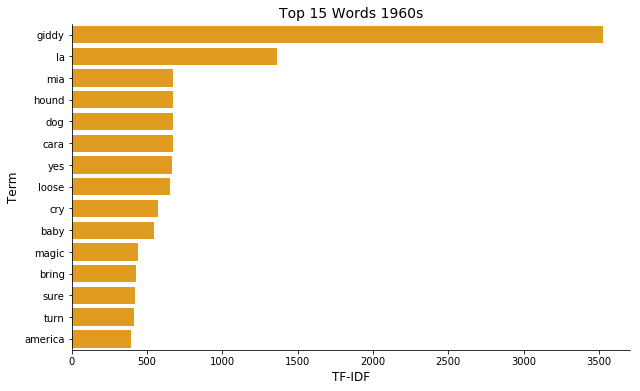

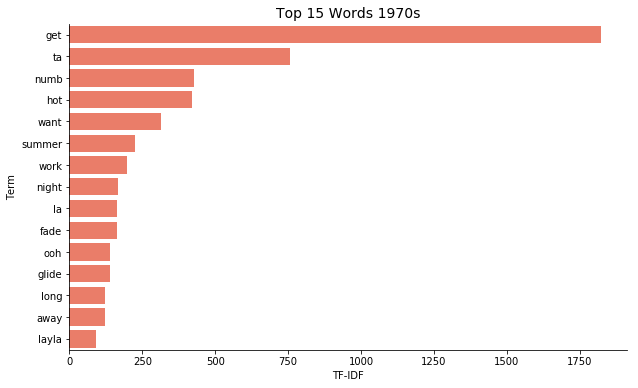

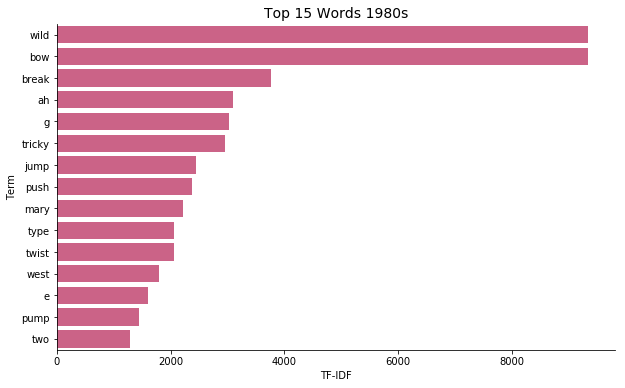

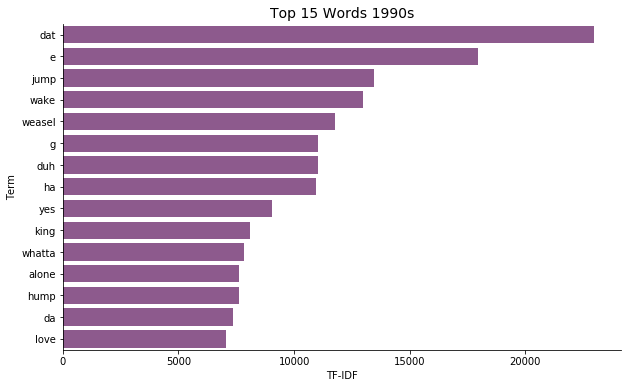

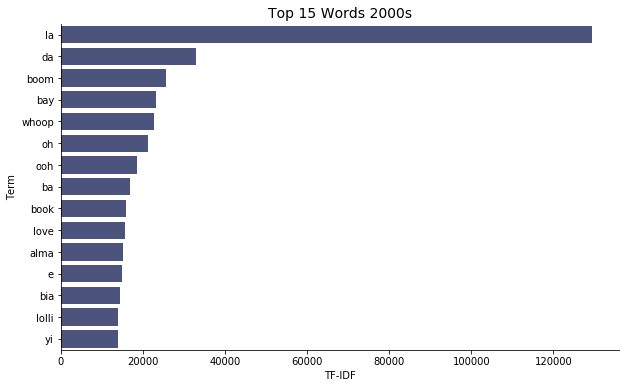

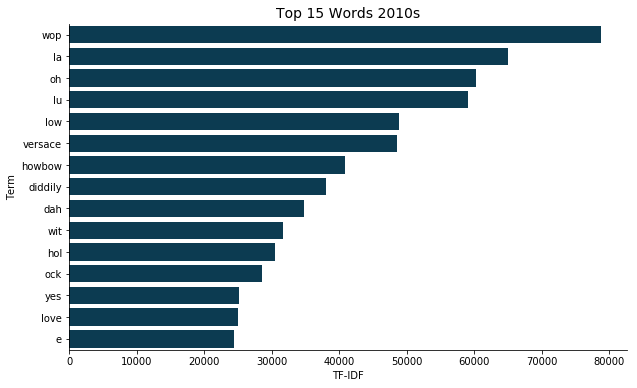

In [22]:
# Bar Graph code for most unique words per decade here
figure_size=(10,6)
xLabel = 'TF-IDF'
yLabel = 'Term'

# plot 1
data1= tfidf_5960[:15]
plt.figure(figsize=figure_size)
sns.barplot(xLabel, yLabel, data = data1, color=colors[0])\
    .set_title("Top 15 Words 1960s", size=titleSize)
plt.xlabel(xLabel, size=axesSize)
plt.ylabel(yLabel, size=axesSize)
sns.despine()

# plot 2
data2 = tfidf_70[:15]
plt.figure(figsize = figure_size)
sns.barplot(xLabel, yLabel, data = data2, color=colors[1])\
    .set_title("Top 15 Words 1970s", size=titleSize)
sns.despine()

# plot 3
data3 = tfidf_80[:15]
plt.figure(figsize = figure_size)
sns.barplot(xLabel, yLabel, data = data3, color=colors[2])\
    .set_title("Top 15 Words 1980s", size=titleSize)
sns.despine()

# plot 4
data4 = tfidf_90[:15]
plt.figure(figsize = figure_size)
sns.barplot(xLabel, yLabel, data = data4, color=colors[3])\
    .set_title("Top 15 Words 1990s", size=titleSize)
sns.despine()

# plot 5
data5 = tfidf_00[:15]
plt.figure(figsize = figure_size)
sns.barplot(xLabel, yLabel, data = data5, color=colors[4])\
    .set_title("Top 15 Words 2000s", size=titleSize)
sns.despine()

# plot 6
data6 = tfidf_10[:15]
plt.figure(figsize = figure_size)
sns.barplot(xLabel, yLabel, data = data6, color=colors[5])\
    .set_title("Top 15 Words 2010s", size=titleSize)
sns.despine()


Note: Some of the words appearing in the dataset are clearly not coherent English. This is either due to Spacy's algorithm or to the nature of some songs themselves. This may have skewed our results in an unanticipated way.


Here, we start to reinforce the idea that the number of words with no meaning increase as move from 1960s - 2010s.  

Instead of looking at the common words per decade, we can see what unique words have stood out from decade to decade, and tie it back to the overarching themes of rap. It is also shown that a lot of the top words in the later decades are short filler ad libs. 

For each decade, let's take the most (coherent) words and put them in a list:

- 1960s: hound, dog, loose, cry, baby, magic, america
- 1970s: numb, hot, summer, work, night, fade, glide, long, away 
- 1980s: wild, tricky, jump, twist, west, pump
- 1990s: jump, wake, weasel, king, whatta, alone, hump, love
- 2000s: boom, whoop, book, love
- 2010s: versace, diddily, ock, love

Now, looking at each list of words for the corresponding decade, let's try to summarize each with some inference:

- 1960s: Around this time, the words may be a little more meaningful just because of the Civil Rights Movement. 'Dog' may refer to someone's pal or buddy, which suggests that artists may have trying to band together with their 'dog[s]' to make a chance in America. Loose and cry are a little bit negatively connotated and that's exaclty how some artists may have been feeling during this time. 'Baby' and 'magic' may refer to love.

- 1970s: This could be an aftershock of the Civil Rights Movement and how opportunities across America were booming for everyone. Many people started to talk about long nights of work, and maybe how numb it made them feel. It is a little surprising to see that there is no occurrences of psycoactive drugs (LSD, heroin, cannabis, cocaine, etc.), but possibly the words 'glide', 'fade', 'long', and 'away' refer to the getaway that drugs provided for people. The 70s was the year of drug misuse and initiated Nixon's 'War on Drugs'

- 1980s: This may be a partying decade. 'Wild', 'jump', and 'twist' could all be describing the energy of the population and how hype rap was. Little did the 1980s know, rap is only going to get more popular from here! 'West' and 'pump' could signify the strength or the confidence that the 'westside' had and either pump could mean the pump someone would receieve after doing drugs or a pump shotgun, perhaps.

- 1990s: This decade thrusted rap into the theme of power. 'King' and 'weasel' are the polar opposites that might be used in a bar to offset the kings (artists with a lot of money) from people that are weasels (regular people with not a lot of money). And the fact of the matter is, some people enjoyed and still enjoy listening to this type of music because it makes them feel as if they're in a place of power themselves, living through the artist's life. 'Hump', 'love', and (maybe) 'alone' refer to sex and the gratification that arises from it, which also ties back into power.

- 2000s: This is where rap starts taking a turn. Looking at the list itself, it is relatively short compared to preceding years. This is because the top TF-IDF values are nonsense (refer to Note above) and could refer to the increased use of ad-libs and/or popularity towards mumble rap. 'Boom', and 'whoop', although slightly awkward, may have been heavily used as ad-libs in songs during the 2000s. But again, cross-referencing this with the graphs of the common words for each decade, we see that 'love' and/or sex have been recurring themes.

- 2010s: This is the same situation as 2000s: we see that many words appear incomprehensible in the graph. But we've finally reached the decade where 'versace', which is an Italian luxury fashion company, has become prominent. The 2010s has ushered into a decade where style and fashion is the simple yet dominant way of flexing and displaying power. 'Love' and 'ock' (which probably refers to something inappropriate), as said previously, is again prominent.  

Looking at the graphs at a whole, you also see that there is a drastic loss in meaning of words in the later decades. Cross-referencing this with the inference bodies above, and you see there is a clear gradual diversion from 'changing America for the better and hard work' to 'power in drinking, guns, and sex'. 

However, this isn't to say that old rap didn't cover topics that are considered indecent. Solely looking at the 1970s, we see that drugs used to be very popular then, too. But generally speaking, contemporary rap doesn't talk about making change anymore, and that's the problem.

#### Boxplot
Lastly, we will look at a boxplot so we can get an better idea of how the unique words have changed over time.

The bottom barplot visualizes the mean, median, and mode for each word after we've run our TF-IDF algorithm on our set of lyrics.

Visualization Description:
- Data: TF-IDF's
- X-axis: words
- Y-axis: tf-idf values

We will get the top 7 words from each decade, take the log of each of their TF-IDF values as a normalization step, and plot them in a box and whisker plot.

The following cell allows for blackbox creation of plottable dataframes for TF-IDF values.

In [24]:
# VARIABLE DEFINITIONS
# numKeywords - number of keywords in final dataframe
# offset - top numKeywords words from 1-numKeywords, numKeywords+1, 2*numKeywords, ...


# Return 6 plottable dataframes which contain the highest numKeywords words 
# with the highest tf-idf values. That is, each returned dataframe will have
# numKeywords words where each word has a tf-idf value for each decade.
def unique_words_df(numKeywords=3, offset=0):
    tfidf_5960_top_for_decades = find_tfidf_values('tfidf_5960', numKeywords, offset)
    tfidf_70_top_for_decades = find_tfidf_values('tfidf_70', numKeywords, offset)
    tfidf_80_top_for_decades = find_tfidf_values('tfidf_80', numKeywords, offset)
    tfidf_90_top_for_decades = find_tfidf_values('tfidf_90', numKeywords, offset)
    tfidf_00_top_for_decades = find_tfidf_values('tfidf_00', numKeywords, offset)
    tfidf_10_top_for_decades = find_tfidf_values('tfidf_10', numKeywords, offset)

    tfidf_df_5960_top = make_plotting_df(tfidf_5960_top_for_decades)
    tfidf_df_70_top = make_plotting_df(tfidf_70_top_for_decades)
    tfidf_df_80_top = make_plotting_df(tfidf_80_top_for_decades)
    tfidf_df_90_top = make_plotting_df(tfidf_90_top_for_decades)
    tfidf_df_00_top = make_plotting_df(tfidf_00_top_for_decades)
    tfidf_df_10_top = make_plotting_df(tfidf_10_top_for_decades)

    return [tfidf_df_5960_top,
                          tfidf_df_70_top, 
                          tfidf_df_80_top, 
                          tfidf_df_90_top, 
                          tfidf_df_00_top, 
                          tfidf_df_10_top]



# Create a plottable dataframe from an array of tuples containing
# information about the tf-idf values for numKeywords words
def make_plotting_df(tfidf_vals):
    col1 = []
    col2 = []
    col3 = []
    for wordEntry in tfidf_vals:
        for year in wordEntry:
            yr = ''
            if year[0] == '00' or year[0] == '10':
                yr = f'20{year[0]}'
            else:
                yr = f'19{year[0]}'
            tfidf_val = year[1]
            word = year[2]
            col1.append(yr)
            col2.append(word)
            col3.append(tfidf_val)
    resDf = pd.DataFrame(data={'year': col1, 'word': col2, 'tfidf_val': col3})
    resDf.sort_values(by=['year'], inplace=True)
    resDf.reset_index(drop=True, inplace=True)
    return resDf


# Given a dataframe containing song data from a certain year (A), go through every
# other year's dataframe and find the tf-idf values for the words with the highest
#  tf-idf values in A. 
def find_tfidf_values(tfidf_df, numKeywords, offset):
    current_year = tfidf_df.split('_')[1]
    if current_year == '5960':
        current_year = '60'
    df = eval(tfidf_df)
    years = {'60', '70', '80', '90', '00', '10'}
    years.remove(current_year)
    values = []

    for i in range(numKeywords): 
        year_data = []
        row = df.iloc[i + offset]
        tf_idf = row['TF-IDF']
        word = row['Term']
        year_data.append((current_year, tf_idf, word))
        for year in years:
            if year == '60':
                year = '5960'
            year_data.append(find_term_in_df(f'tfidf_{year}', word))
        values.append(year_data)
    return values


# Given a dataframe, find if the term has a non-zero TF-IDF value.
# If it does, return the term, its tf-idf value, and the current-year
# Otherwise, return a 0
def find_term_in_df(tfidf_df_str, term):
    current_year = tfidf_df_str.split('_')[1]
    if current_year == '5960':
        current_year = '60'
    df = eval(tfidf_df_str)
    res = df.loc[df['Term'] == term]
    if (res.empty):
        return (current_year, 0, term)
    else:
        return (current_year, res['TF-IDF'].values[0], term)

The following functions allow for blackbox creation of line graphs and box plots.

In [25]:
# Line Graph code for unique words per decade here
# figure_size: size of graph for plotting
def show_line_graph(data, figure_size):
    ax = plt.subplots(figsize=figure_size)
    ax = sns.lineplot(data=data, x='year', y='tfidf_val', hue='word', palette=sns.color_palette("Set2", 6))
    sns.despine()
    ax.set_xlabel('Decade', size=20)
    ax.set_ylabel('TF-IDF Values', size=20)
    ax.axes.set_title('Unique words per decade', size=25)

    for x, y in zip(data['year'], data['tfidf_val']):
        plt.text(x = x, y = y-150, s='{:.0f}'.format(y))

    plt.show()
    

# Boxplot code for unique words per decade here
# figure_size: size of graph for plotting
# observations: number of total observations in graph
# year: year of boxplot instance
# plotNum: subplot number for identification
def show_boxplot(data, figure_size, observations, year, plotNum=0):
    if plotNum > 4:
        print('Maximum subplots reached')
        return
    
    plotNumOffset = 220
    
    data['tfidf_val'] = data['tfidf_val'].replace(0, 1)
    data['log_tfidf_val'] = np.log10(data['tfidf_val'])
    ax = plt.subplots(figsize=figure_size)
    ax = plt.subplot(plotNum + plotNumOffset)
    ax = sns.boxplot(x='word', y='log_tfidf_val', data=data, palette='Purples')
    sns.despine()
    ax.set_xlabel('Words', size=axesSize)
    ax.set_ylabel('TF-IDF Values', size=axesSize)
    ax.axes.set_title(f'Box Plot for Top {observations} TF-IDF Values from {year}', size=titleSize)
    
    plt.show()

We realized that the TF-IDF values (like shown with the barplots above), will be largely skewed in the boxplots, so some words, with a noticable difference in TF-IDF value, may not visually appear correctly. 

To correct this, we decided to take the log of the TF-IDF values. In doing, so we realized that, because some decades may not contain the words from other decades, our dataframe will have words with a TF-IDF value of 0, which we cannot take the log of. So to further correct this, as demonstrated in A3, we simply replace the TF-IDF value with one that will not jeopardize the overall goal of the visualization.

In [26]:
numTopWordsPerDecade = 5
# Unpacking
df_res_5960, df_res_70, df_res_80, df_res_90, df_res_00, df_res_10 = unique_words_df(numTopWordsPerDecade)

# Replacing 0s with 1s, so the log10(1) = 0
df_res_5960['tfidf_val'] = df_res_5960['tfidf_val'].replace(0, 1)
df_res_70['tfidf_val'] = df_res_70['tfidf_val'].replace(0, 1)
df_res_80['tfidf_val'] = df_res_80['tfidf_val'].replace(0, 1)
df_res_90['tfidf_val'] = df_res_90['tfidf_val'].replace(0, 1)
df_res_00['tfidf_val'] = df_res_00['tfidf_val'].replace(0, 1)
df_res_10['tfidf_val'] = df_res_10['tfidf_val'].replace(0, 1)

# Taking the log and storing into a different column for plotting
df_res_5960['log_tfidf_val'] = np.log10(df_res_5960['tfidf_val'])
df_res_70['log_tfidf_val'] = np.log10(df_res_70['tfidf_val'])
df_res_80['log_tfidf_val'] = np.log10(df_res_80['tfidf_val'])
df_res_90['log_tfidf_val'] = np.log10(df_res_90['tfidf_val'])
df_res_00['log_tfidf_val'] = np.log10(df_res_00['tfidf_val'])
df_res_10['log_tfidf_val'] = np.log10(df_res_10['tfidf_val'])

# Visually shows the format of one dataframe, so you can get an idea of what the others look like too
print(df_res_5960)

    year   word      tfidf_val  log_tfidf_val
0   1960  giddy    3528.527425       3.547593
1   1960    dog     675.382202       2.829550
2   1960     la    1365.798303       3.135387
3   1960  hound     675.382202       2.829550
4   1960    mia     675.382202       2.829550
5   1970  giddy       1.000000       0.000000
6   1970    dog       1.000000       0.000000
7   1970  hound       1.000000       0.000000
8   1970     la     165.042437       2.217596
9   1970    mia       1.000000       0.000000
10  1980  hound       1.000000       0.000000
11  1980    mia       1.724276       0.236607
12  1980    dog       2.846492       0.454310
13  1980  giddy       1.000000       0.000000
14  1980     la     450.355319       2.653555
15  1990     la    5824.262459       3.765241
16  1990    dog    1123.342583       3.050512
17  1990    mia     361.771828       2.558435
18  1990  giddy       2.683047       0.428628
19  1990  hound       1.000000       0.000000
20  2000    dog     556.809654    

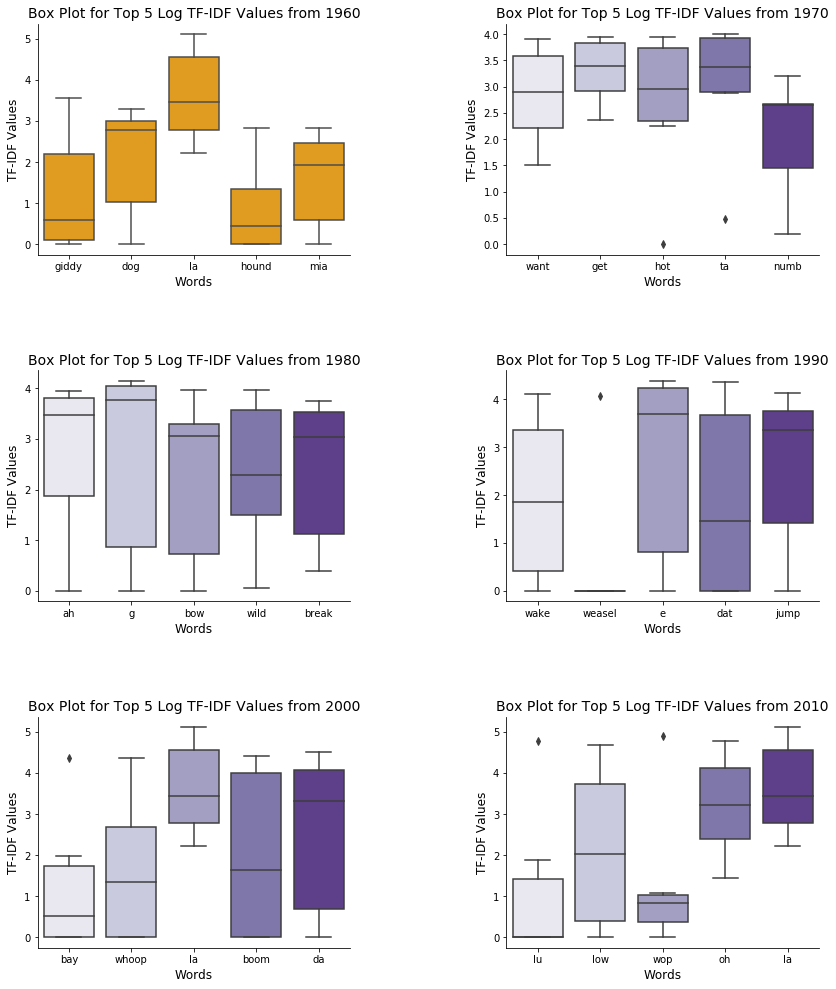

In [30]:
# Graphing cell!
# Constants (in order to avoid magic numbers and strings)
figure_size = (14, 17)
x = 'word'
xLabel = 'Words'
y = 'log_tfidf_val'
yLabel = 'TF-IDF Values'
plotLayout = 320
beginStr = f'Box Plot for Top {numTopWordsPerDecade} Log TF-IDF Values from'
plt.figure(figsize=figure_size)
plt.subplots_adjust(wspace=0.5, hspace=0.5)


# plot 1
plotNum = 1
plt.subplot(plotLayout + plotNum)
ax1 = sns.boxplot(x=x, y=y, data=df_res_5960, color=colors[0])
sns.despine()
ax1.set_xlabel(xLabel, size=axesSize)
ax1.set_ylabel(yLabel, size=axesSize)
ax1.axes.set_title(f'{beginStr} 1960', size=titleSize)

# plot 2
plotNum = 2
plt.subplot(plotLayout + plotNum)
ax2 = sns.boxplot(x=x, y=y, data=df_res_70, color=colors[1])
sns.despine()
ax2.set_xlabel(xLabel, size=axesSize)
ax2.set_ylabel(yLabel, size=axesSize)
ax2.axes.set_title(f'{beginStr} 1970', size=titleSize)

# plot 3
plotNum = 3
plt.subplot(plotLayout + plotNum)
ax3 = sns.boxplot(x=x, y=y, data=df_res_80, color=colors[2])
sns.despine()
ax3.set_xlabel(xLabel, size=axesSize)
ax3.set_ylabel(yLabel, size=axesSize)
ax3.axes.set_title(f'{beginStr} 1980', size=titleSize)

# plot 4
plotNum = 4
plt.subplot(plotLayout + plotNum)
ax4 = sns.boxplot(x=x, y=y, data=df_res_90, color=colors[3])
sns.despine()
ax4.set_xlabel(xLabel, size=axesSize)
ax4.set_ylabel(yLabel, size=axesSize)
ax4.axes.set_title(f'{beginStr} 1990', size=titleSize)

# plot 5
plotNum = 5
plt.subplot(plotLayout + plotNum)
ax5 = sns.boxplot(x=x, y=y, data=df_res_00, color=colors[4])
sns.despine()
ax5.set_xlabel(xLabel, size=axesSize)
ax5.set_ylabel(yLabel, size=axesSize)
ax5.axes.set_title(f'{beginStr} 2000', size=titleSize)

# plot 6
plotNum = 6
plt.subplot(plotLayout + plotNum)
ax6 = sns.boxplot(x=x, y=y, data=df_res_10, color=colors[5])
sns.despine()
ax6.set_xlabel(xLabel, size=axesSize)
ax6.set_ylabel(yLabel, size=axesSize)
ax6.axes.set_title(f'{beginStr} 2010', size=titleSize)

plt.show()

In [28]:
def return_mean(dataframeStr, word):
    year = dataframeStr.split('_')[2]
    decade = '19'
    if year == '5960':
        year = '60'
    if year == '00' or year == '10':
        decade = '20'
    
    df = eval(dataframeStr)
    maxVal = max(df['log_tfidf_val'])
    res = df[df['word'] == word].mean()['log_tfidf_val']
    print(f'{word}\'s mean: {round(res, 4)} \n\
        compared to max of {round(maxVal, 4)} in {decade}{year}\n')

    
return_mean('df_res_5960', 'hound')
return_mean('df_res_70', 'numb')
return_mean('df_res_80', 'wild')
return_mean('df_res_90', 'weasel')
return_mean('df_res_00', 'bay')
return_mean('df_res_10', 'lu')

hound's mean: 0.8662 
        compared to max of 5.1123 in 1960

numb's mean: 2.0694 
        compared to max of 4.0009 in 1970

wild's mean: 2.3055 
        compared to max of 4.1502 in 1980

weasel's mean: 0.6784 
        compared to max of 4.3875 in 1990

bay's mean: 1.2317 
        compared to max of 5.1123 in 2000

lu's mean: 1.1093 
        compared to max of 5.1123 in 2010



Each graph has 5 words which represent the top 5 words from that decade after TF-IDF adjustments. 

Let's analyze each decade separately:

- 1960s: Even though 'giffy' had the highest TF-IDF value, we see that 'la' has been consistently high through each decade with its maximum being 5.11, whereas 'hound' (mean of 0.866) and 'giddy', because they have low means, are more unique to the 1960s.

- 1970s: 'Get' was pretty consistent throughout every decade, but it seems 'ta' even more so. Therefore, in this graph we don't see any unexpected results, other than the fact that 'numb' (mean of 2.0694)  was more unique to this decade.

- 1980s: 'G' was the most common word throughout the decades. Every word besides 'wild' (mean of 2.305) was found in every decade, each occurrence with a high TF-IDF value. 'Wild' was the most unique to the 1980s.

- 1990s: 'E' was the most common word throughout the decades. 'Weasel' had the lowest of the low in terms of average TF-IDF values (mean of 0.678). That means it was the most unique word in the 1990's.

- 2000s: 'La' was the most common word throughout the decades. 'Bay' had the lowest TF-IDF value (mean of 1.232), which means it was the most unique word in the 2000s.

- 2010s: 'La' was the most common word throughout the decades. 'Lu" had the lowest TF-IDF value (mean of 1.109), which means it was the most unique word in the 2010s.

### Analysis

1. What approaches did you use? Why? 
    - We wanted to focus on getting lyrics that were cleaned (without stop words, brackets, punctuation, etc.) and create visualizations from two sets of data: on raw data and data adjusted from TF-IDF. This way, we could see what the most common words were, and what words were unique to each decade, respectively.<br><br>

2. How did you go about cleaning the data and looking at lyrics? Why did you think this was the best way to go about conducting this analysis/study?
    - We started with a dataset of over 28000 songs and had to trim it to about 3800. We only set out to analyze rap songs, so we just checked the genre list of each song and checked to see if it included 'rap'. Then, we retrieved the lyrics, and dropped songs whose lyrics we could not successfully scrape (Genius). Lastly, we used Spacy to remove any stop words, expand contractions for easier parsing, correct spelling of words with nltk, and normalized the data (tokenizing, removing  redundant symbols, etc.) so we could conduct our analysis. This was the best way to go about cleaning the data because it allowed us to focus on keywords of the songs instead of including random stop words in our visualizations.<br><br>

3. What were the results? Verbatim: talk about the data and what you found. State any crazy or interesting findings here.
	- We saw that the average length of songs gradually increased over the years. This may explain how the increased addition of ad-libs became a normality. The data also shows each decade had many verbs and incoherent words as top words. Also, every decade had a common overarching theme of 'love' (and perhaps 'sex'), even though they differed in many ways. In our TF-IDF graph and barplot, we saw that, perhaps to do the influence of society during that time, decades focused on specific topics and were constantly changing. Although, both sets of barplots indicate that the 2000s had introduced a new wave of popularity for profanity, flexing style, and sex.<br><br>

4. Has rap music changed according to the data? Or has it remained the same in terms of topics?
	- According to the data, rap music has evolved over the decades, but we can see there is an 'almighty' overarching theme of love. Although rap post-2000s didn't focus on any global events from the looks of it, we can see that rap pre-2000s did. Topics ranged from fixing America, to the gratification of drugs, partying, and power. In place of a global event, contemporary rap has found a home in a mix of these genres: partying, power, and drugs, while introducing a new craze for fashion and an increased emphasis on love and sex. <br><br>


5. What was your interpretation of these findings? Connect this back to your question and hypothesis. 
	- These findings DO NOT suggest that rap has focused on the same topic for the past 60 years. We can see that the most popular topics in contemporary rap are under the umbrella  stated above, but this does not necessarily mean that rap music's lyrics have become repetitive and monotonous. <br><br>

# Ethics and Privacy

We will be looking at songs that have been the most popular in each decade. This will not introduce any bias in our dataset aside from the fact that these songs were originally placed due to the OPINIONS of the listeners. 

Our dataset will be formed by looking at the lyrics for each song that are outputted by the lyrics extractor package, but we will have to check for credibility by cross-verifying. Because lyrics extractor offers various mediums for accessing song lyrics, we can easily compare lyrics by using a set of relational operators on their string representations. 

Again, our selection of songs will not have any bias aside from the fact that Wikipedia chooses their cumulative lists based on popularity. Therefore, it may leave out rap songs that are not as popular and may not be a true representation of ALL rap songs for each decade. In our project, we will explicitly state that we will only be performing an analysis on the most popular songs for each decade. 

From the explanation above, because we are not looking at ALL rap music (which is extremely difficult because lots of rap music are not even publicized), it may discredit our work if we do not carefully state all the parameters in our study (ie what we've included, excluded, and took into or out of consideration).

In terms of data privacy, every lyric we find is for public-use, as lyrics extractor will only pull from public databases. Therefore, we will not break any TOS.


## <mark><strong>BOTTOM CELL NEEDS TO BE FIXED</strong></mark>

# Conclusion & Discussion

- TODO

# Team Contributions

We will break this section down into the subteam each member was a part of, the contributions to the final project notebook, how active each member was during meetings, and whether or not anyone was tardy/absent.

- Format
    - Member
        - Category 1 = [Algorithms, Visualizations]
        - Category 2 = [None, Hardly Any, Average, Good, Great]
        - Category 3 = [Silent, Decently Active, Very Active]
        - Category 4 = [Number of Times Tardy/[Dates of Absence]]
    

- Notes
    - Categories 2 and 3
        - Both of these categories were determined by taking the average of 4 anonymous google form submissions following [this format](https://docs.google.com/forms/d/e/1FAIpQLSfrbG93m-6O9fyvadRJ3yDjEpa8rrN9wi0z7iOdZpci7vhUCw/viewform?usp=sf_link). Eg for members A,B,C,D,E: member A would fill out every form except form A, as form A refers to the score for member A.
    - Category 4
        - Accumulated data from meeting logs throughout the following days:
            - Meeting Dates = [10/7, 10/17, 10/18, 10/24, 10/31, 11/7, 11/14, 11/17, 11/21, 12/5, 12/8, 12/12]
            - Total Meeting Count = 12

- Andrew Li
    - Visualizations
    - .
    - .
    - [0. [10/18]]
- Jialin Shan
    - Algorithms
    - .
    - .
    - [0, []]
- Sameer Ahmed
    - Visualizations
    - .
    - .
    - [0, []]
- Lacey Umamoto
    - Algorithms
    - .
    - .
    - [0, []]
- Rickesh Khilnani
    - Visualizations
    - .
    - .
    - [0, [12/5]]